In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [19]:
df['Age'].max()

60

In [20]:
df['EstimatedSalary'].min()

15000

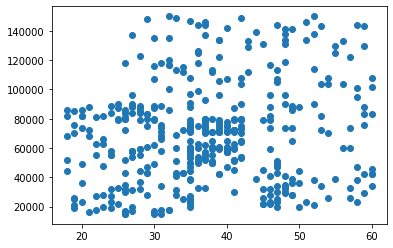

In [2]:
# Visualization of Age on x axis and Salary on Y axis
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

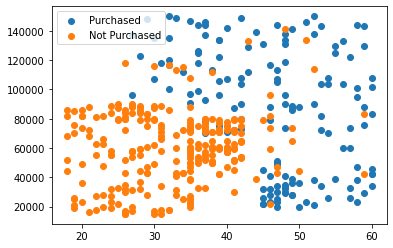

In [7]:
# Split the dataframe into p_df and np_df
p_df = df[df['Purchased']==1]
np_df = df[df['Purchased']==0]
plt.scatter(p_df['Age'],p_df['EstimatedSalary'],label = 'Purchased')
plt.scatter(np_df['Age'],np_df['EstimatedSalary'],label = 'Not Purchased')
plt.legend()
plt.show()

In [10]:
# Step 2 : Split data into input and output

x = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values

In [11]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [12]:
# Step 3: Divide input and output into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


In [21]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [22]:
# Step 4 : Apply logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred =model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [24]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [25]:
import numpy as np
print(np.unique(y_pred,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1], dtype=int64), array([74, 26], dtype=int64))
(array([0, 1], dtype=int64), array([63, 37], dtype=int64))


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
confusion_matrix(y_pred,y_test)

array([[62, 12],
       [ 1, 25]], dtype=int64)

In [30]:
(62+25)/(62+12+1+25)

0.87

In [31]:
accuracy_score(y_pred,y_test)

0.87

In [32]:
# Visualize the data with decision boundary
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

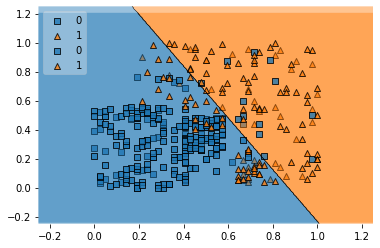

In [36]:
plot_decision_regions(x_test, y_test, clf=model, legend=2,zoom_factor=4.0)
plot_decision_regions(x_train, y_train, clf=model, legend=2,zoom_factor=4.0)